Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    df=pd.read_csv(file)
    return df

def exercise_1(df):
    col_names=list(df.head(n=0))
    return col_names
    
def exercise_2(df, k):
    first_k=df.head(n=k)
    return first_k

def exercise_3(df, k):
    r_sample=df.sample(n=k)
    return r_sample

def exercise_4(df):
    t_list=[]
    for row in df.iterrows():
        t=row[1]['type']
        if t in t_list:
            pass
        else:
            t_list.append(t)
    return t_list

def exercise_5(df):
    dest_t={}
    for index,row in df.iterrows():
        dest=row['nameDest']
        if dest in dest_t:
            dest_t[dest]+=1
        else:
            dest_t[dest]=1
    top_10=(pd.Series(dest_t)).sort_values(ascending=False).head(10)
    return top_10

def exercise_6(df):
    count1=0
    count2=0
    for index,row in df.iterrows():
        count1+=1
        if row['isFraud']==1 or row['isFlaggedFraud']==1:
            count2+=1
            print(f'ROW NUMBER:{count1+1}','\n',row,'\n')
        else:
            continue
    print(f'Number of frauds: {count2}')

def exercise_7(df):
    result = df.groupby('nameOrig').agg(distinct_dest_count=('nameDest', 'nunique')).reset_index()
    result=result.sort_values(by='distinct_dest_count',ascending=False)
    return result

def visual_1(df):
    def transaction_counts(df):
        t_dic={}
        for index,row in df.iterrows():
            t=row['type']
            if t in t_dic:
                t_dic[t]+=1
            else:
                t_dic[t]=1
        return pd.Series(t_dic)
        
    def transaction_counts_split_by_fraud(df):
        t_dic_f={}
        for index,row in df.iterrows():
            t=row['type']
            f1=row['isFraud']
            f2=row['isFlaggedFraud']
            if t in t_dic_f: 
                if f1==1 or f2==1:
                    t_dic_f[t]+=1
                else:
                    pass
            else:
                if f1==1 or f2==1:
                    t_dic_f[t]=1
        return pd.Series(t_dic_f)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types vs. Counts')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Counts')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types vs Fraud')
    axs[1].set_xlabel('Transaction types')
    axs[1].set_ylabel('Fraud')
    fig.suptitle('Transaction types plit by fraud')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'This is a table that compares, on the one hand, the activity of each type in the dataset; on the other hand, it compares each type with frauds to show which activity presents more frauds.'

def visual_2(df):
    def query(df):
        og_deltas = []
        neo_deltas = []
        for index, row in df.iterrows():
            if row['type'] == 'CASH_OUT':
                og_delta = row['newbalanceOrig'] - row['oldbalanceOrg']
                neo_delta = row['newbalanceDest'] - row['oldbalanceDest']
                og_deltas.append(og_delta)
                neo_deltas.append(neo_delta)
        return pd.DataFrame({'Origin delta balance':og_deltas,'Destination delta balance':neo_deltas})
        
    plot = query(df).plot.scatter(x='Origin delta balance',y='Destination delta balance')
    plot.set_title('Origin delta vs. Destination delta for Cash Out transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'This graph plots the values of origin account delta balances and destination account delta balances for Cash out transactions.'

def exercise_custom(df):
    count1=0
    count2=0
    og_deltas = []
    neo_deltas = []
    for index,row in df.iterrows():
        count1+=1
        if row['isFraud']==1 or row['isFlaggedFraud']==1:
            count2+=1
            og_delta = row['newbalanceOrig'] - row['oldbalanceOrg']
            neo_delta = row['newbalanceDest'] - row['oldbalanceDest']
            og_deltas.append(og_delta)
            neo_deltas.append(neo_delta)
        else:
            continue
    
    tot_og_d=len(og_deltas)
    avg_og_d=sum(og_deltas)/tot_og_d 

    tot_des_d=len(neo_deltas)
    avg_des_d=sum(neo_deltas)/tot_des_d 
   
    print(f'Number of movements: {count1}')
    print(f'Number of frauds: {count2}')
    print(f'Percentage of frauds per movement: ',((count2/count1)*100),'%')
    print(f'Average delta of origin account (fraudulent):',(avg_og_d))
    print(f'Average delta of destination account (fraudulent):',(avg_des_d))
    
    delta_df = pd.DataFrame({'Origin delta balance': og_deltas, 'Destination delta balance': neo_deltas})
    
    return delta_df
    
def visual_custom(df):    
    fig,axs=plt.subplots(2,1,figsize=(10,10))
    
    delta_df['Origin delta balance'].plot(kind='hist',bins=30,ax=axs[0],alpha=0.7,color='blue')
    axs[0].set_title('Distribution of Origin Delta Balance (Fraudulent)')
    axs[0].set_xlabel('Origin Delta Balance')
    axs[0].set_ylabel('Frequency')
    
    delta_df['Destination delta balance'].plot(kind='hist',bins=30,ax=axs[1],alpha=0.7,color='red')
    axs[1].set_title('Distribution of Destination Delta Balance (Fraudulent)')
    axs[1].set_xlabel('Destination Delta Balance')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return 'This graph plots the distribution of origin and destination deltas to help understand the spread and characteristics of the deltas in fraudulent transactions.'

In [222]:
df = exercise_0('transactions.csv')

Number of movements: 200000
Number of frauds: 147
Percentage of frauds per movement:  0.0735 %
Average delta of origin account (fraudulent): -606044.9263945579
Average delta of destination account (fraudulent): 465991.86585034017


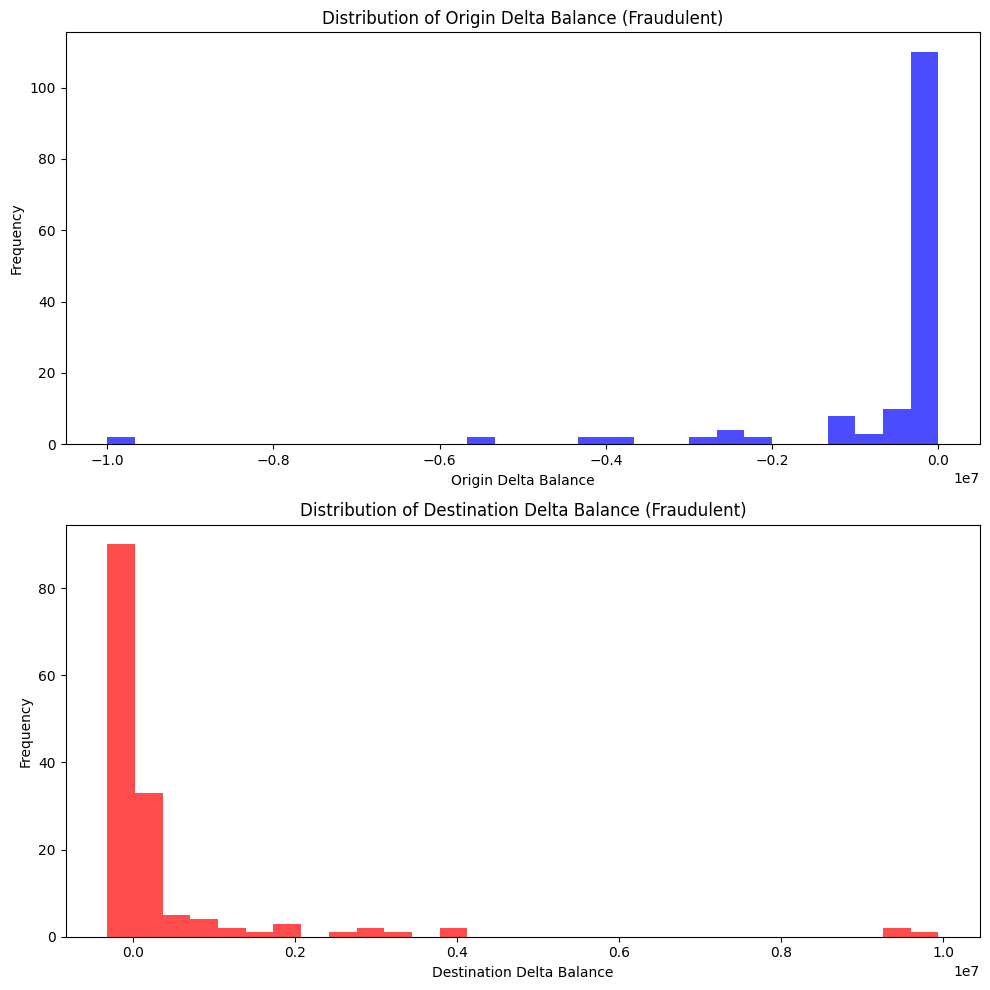

In [291]:
# Test exercises here
def exercise_custom(df):
    count1=0
    count2=0
    og_deltas = []
    neo_deltas = []
    for index,row in df.iterrows():
        count1+=1
        if row['isFraud']==1 or row['isFlaggedFraud']==1:
            count2+=1
            og_delta = row['newbalanceOrig'] - row['oldbalanceOrg']
            neo_delta = row['newbalanceDest'] - row['oldbalanceDest']
            og_deltas.append(og_delta)
            neo_deltas.append(neo_delta)
        else:
            continue
    
    tot_og_d=len(og_deltas)
    avg_og_d=sum(og_deltas)/tot_og_d 

    tot_des_d=len(neo_deltas)
    avg_des_d=sum(neo_deltas)/tot_des_d 
   
    print(f'Number of movements: {count1}')
    print(f'Number of frauds: {count2}')
    print(f'Percentage of frauds per movement: ',((count2/count1)*100),'%')
    print(f'Average delta of origin account (fraudulent):',(avg_og_d))
    print(f'Average delta of destination account (fraudulent):',(avg_des_d))
    
    delta_df = pd.DataFrame({'Origin delta balance': og_deltas, 'Destination delta balance': neo_deltas})
    
    return delta_df

def visual_custom(df):    
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    delta_df['Origin delta balance'].plot(kind='hist', bins=30, ax=axs[0], alpha=0.7, color='blue')
    axs[0].set_title('Distribution of Origin Delta Balance (Fraudulent)')
    axs[0].set_xlabel('Origin Delta Balance')
    axs[0].set_ylabel('Frequency')
    
    delta_df['Destination delta balance'].plot(kind='hist', bins=30, ax=axs[1], alpha=0.7, color='red')
    axs[1].set_title('Distribution of Destination Delta Balance (Fraudulent)')
    axs[1].set_xlabel('Destination Delta Balance')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

exercise_custom(df)

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'This is a table that compares, on the one hand, the activity of each type in the dataset; on the other hand, it compares each type with frauds to show which activity presents more frauds.'

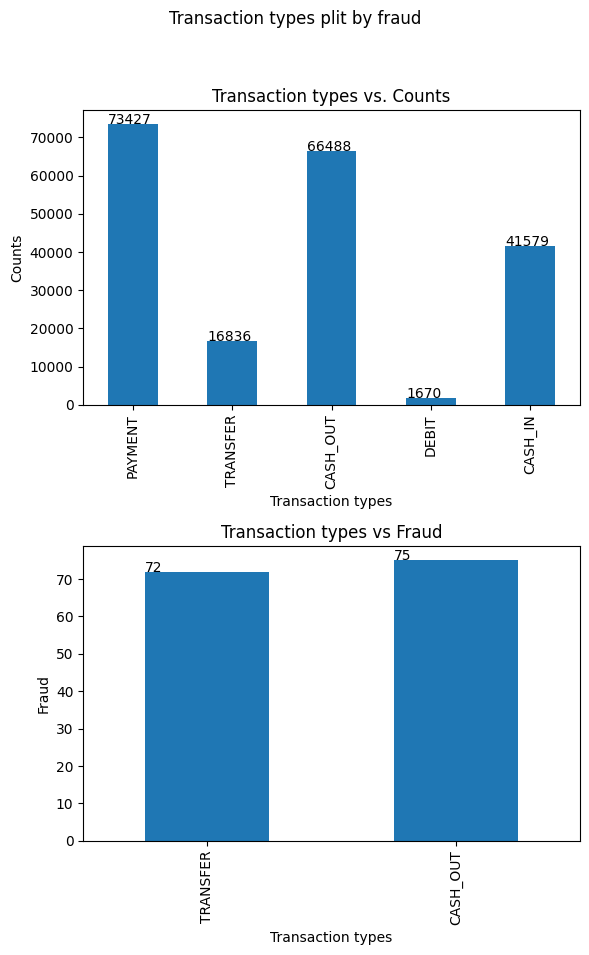

In [236]:
def visual_1(df):
    def transaction_counts(df):
        t_dic={}
        for index,row in df.iterrows():
            t=row['type']
            if t in t_dic:
                t_dic[t]+=1
            else:
                t_dic[t]=1
        return pd.Series(t_dic)
        
    def transaction_counts_split_by_fraud(df):
        t_dic_f={}
        for index,row in df.iterrows():
            t=row['type']
            f1=row['isFraud']
            f2=row['isFlaggedFraud']
            if t in t_dic_f: 
                if f1==1 or f2==1:
                    t_dic_f[t]+=1
                else:
                    pass
            else:
                if f1==1 or f2==1:
                    t_dic_f[t]=1
        return pd.Series(t_dic_f)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types vs. Counts')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Counts')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types vs Fraud')
    axs[1].set_xlabel('Transaction types')
    axs[1].set_ylabel('Fraud')
    fig.suptitle('Transaction types plit by fraud')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'This is a table that compares, on the one hand, the activity of each type in the dataset; on the other hand, it compares each type with frauds to show which activity presents more frauds.'

visual_1(df)


'This graph plots the values of origin account delta balances and destination account delta balances for Cash out transactions.'

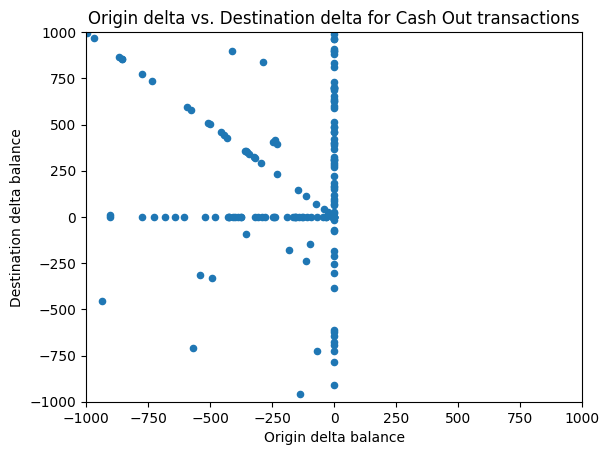

In [256]:
#Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions (newbalance-oldbalance)
def visual_2(df):
    def query(df):
        og_deltas = []
        neo_deltas = []
        for index, row in df.iterrows():
            if row['type'] == 'CASH_OUT':
                og_delta = row['newbalanceOrig'] - row['oldbalanceOrg']
                neo_delta = row['newbalanceDest'] - row['oldbalanceDest']
                og_deltas.append(og_delta)
                neo_deltas.append(neo_delta)
        return pd.DataFrame({'Origin delta balance':og_deltas,'Destination delta balance':neo_deltas})
        
    plot = query(df).plot.scatter(x='Origin delta balance',y='Destination delta balance')
    plot.set_title('Origin delta vs. Destination delta for Cash Out transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'This graph plots the values of origin account delta balances and destination account delta balances for Cash out transactions.'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [292]:
def exercise_custom(df):
    count1=0
    count2=0
    og_deltas = []
    neo_deltas = []
    for index,row in df.iterrows():
        count1+=1
        if row['isFraud']==1 or row['isFlaggedFraud']==1:
            count2+=1
            og_delta = row['newbalanceOrig'] - row['oldbalanceOrg']
            neo_delta = row['newbalanceDest'] - row['oldbalanceDest']
            og_deltas.append(og_delta)
            neo_deltas.append(neo_delta)
        else:
            continue
    
    tot_og_d=len(og_deltas)
    avg_og_d=sum(og_deltas)/tot_og_d 

    tot_des_d=len(neo_deltas)
    avg_des_d=sum(neo_deltas)/tot_des_d 
   
    print(f'Number of movements: {count1}')
    print(f'Number of frauds: {count2}')
    print(f'Percentage of frauds per movement: ',((count2/count1)*100),'%')
    print(f'Average delta of origin account (fraudulent):',(avg_og_d))
    print(f'Average delta of destination account (fraudulent):',(avg_des_d))
    
    delta_df = pd.DataFrame({'Origin delta balance': og_deltas, 'Destination delta balance': neo_deltas})
    
    return delta_df
    
def visual_custom(df):    
    fig,axs=plt.subplots(2,1,figsize=(10,10))
    
    delta_df['Origin delta balance'].plot(kind='hist',bins=30,ax=axs[0],alpha=0.7,color='blue')
    axs[0].set_title('Distribution of Origin Delta Balance (Fraudulent)')
    axs[0].set_xlabel('Origin Delta Balance')
    axs[0].set_ylabel('Frequency')
    
    delta_df['Destination delta balance'].plot(kind='hist',bins=30,ax=axs[1],alpha=0.7,color='red')
    axs[1].set_title('Distribution of Destination Delta Balance (Fraudulent)')
    axs[1].set_xlabel('Destination Delta Balance')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return 'This graph plots the distribution of origin and destination deltas to help understand the spread and characteristics of the deltas in fraudulent transactions.'




Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.